# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [176]:
# Importar a base de dados para Python
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)
# Visualizar a base e fazer os ajustes na base de dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

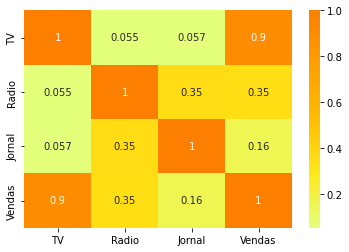

In [177]:
# Analise exploratoria - entender como a sua base de dados esta se comportando
# matplotlib e o seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Cria o grafico
sns.heatmap(tabela.corr(), annot=True, cmap="Wistia") # Cria a tabela correlacionada

# Exibe o grafico
plt.show()



#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [178]:

#y -> quem voce quer prever -> vendas
#x -> o resto da base de dados (quem vai ser usado na previsao)

y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2) # separando treino e teste no sklearn


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [179]:
# Criar a inteligencia artificial e fazer as previsoes
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

mod_reg = LR() # Regressao linear
mod_arv = RF() # Random Forest Regressor

mod_reg.fit(x_treino, y_treino)
mod_arv.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [180]:
# Testar pra ver qual ingeligencia e melhor
prev_reg = mod_reg.predict(x_teste) #Armazena a reg x_teste
prev_arv = mod_arv.predict(x_teste) #Armazena a arv x_teste

from sklearn.metrics import r2_score

print(r2_score(y_teste, prev_reg)) # Calcula a real com a previsao e da a % de eficacia
print(r2_score(y_teste, prev_arv))


0.9236787658309867
0.9713344688066795


#### Visualização Gráfica das Previsões

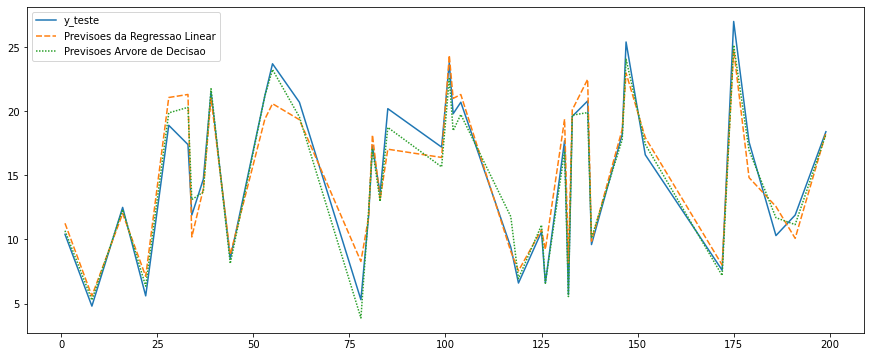

In [181]:
tabela_aux = pd.DataFrame()
tabela_aux['y_teste'] = y_teste
tabela_aux['Previsoes da Regressao Linear'] = prev_reg
tabela_aux['Previsoes Arvore de Decisao'] = prev_arv


plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [182]:
novos = pd.read_csv("novos.csv") # Analisa o outro arquivo excel com dados ficticios para previsao.
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [183]:
# Modelo Vencedor Arvore de Decisao
previsao = mod_arv.predict(novos)
print(previsao)

[ 7.356  8.485 20.181]


In [184]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#pacotes nescessarios para inteligencia artificial